In [1]:
import pandas as pd
df = pd.read_excel("cleanedDatasetR.xlsx")

In [2]:
df.sort_values(by = 'Trending_Date', ascending = True).head()

,Trending_Date,Channel_Name,Publish Date,Video_Name,Category_ID,Category_Name,View_Number,Like_Number,Comment_Number,Duration,...,TagsInTitle,NumInTitle,EmojiInTitle,ChineseInTitle,EnglishInTitle,Eng&ChiInTitle,OtherLanguageInTitle,ChineseInTags,EnglishInTags,Eng&ChiInTags
723,2024-02-10,双面笑笑,2024-02-08T10:30:05Z,商战之老六集团开业。#搞笑 #双面笑笑 #反转,22,People & Blogs,284507,18343,57,00:43,...,1,0,0,1,0,0,0,1,1,1
762,2024-02-10,Blueberry TV,2024-02-07T06:42:56Z,主人误会马犬拆家咬坏充电器，调监控才发现幸亏有它在！狗子凭一己之力避免了一场火灾，这反应力和...,29,Nonprofits & Activism,317052,8051,72,00:24,...,1,0,0,1,0,0,0,0,0,0
763,2024-02-10,CCTV春晚,2024-02-09T17:24:56Z,回看：【4K超高清】四地分会场各具特色 精彩节目接连上演！中央广播电视总台《2024年春节联...,24,Entertainment,1310620,13960,272,4:42:21,...,0,1,0,1,1,1,0,1,1,1
764,2024-02-10,醒醒吧张律,2024-02-07T07:00:16Z,你和你的朋友、家人還剩下多少相處的時間呢？,22,People & Blogs,320845,22542,100,01:00,...,0,0,0,1,0,0,0,1,1,1
765,2024-02-10,男人的快樂老丁,2024-01-29T09:00:36Z,湯姆·斯特林發動機！ 真幼稚，但是真好玩！,22,People & Blogs,899675,24110,183,00:43,...,0,0,0,1,0,0,0,1,1,1


C:\Users\sa654\AppData\Local\Temp\ipykernel_10768\1108281089.py:3: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  simpledf = df.groupby('Video_Name').agg({'Trending_Date':max}).reset_index()


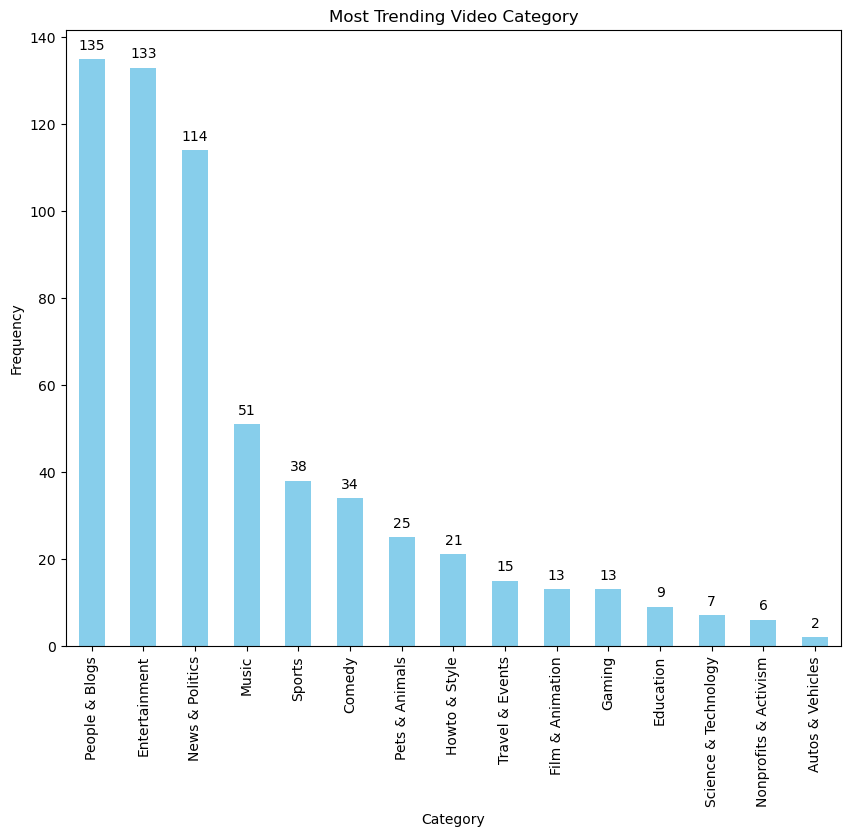

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
simpledf = df.groupby('Video_Name').agg({'Trending_Date':max}).reset_index()
simple_df = pd.merge(df, simpledf, on=['Video_Name', 'Trending_Date'])

# simple_df['Category_Name'].value_counts().plot.bar()
count = simple_df['Category_Name'].value_counts()

plt.figure(figsize=(10, 8))
ax = count.plot(kind='bar', color='skyblue')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Most Trending Video Category')
plt.show()

In [4]:
simple_df['Trending_Date'] = pd.to_datetime(simple_df['Trending_Date']).dt.tz_localize(None)
simple_df['Publish_Date'] = pd.to_datetime(simple_df['Publish Date']).dt.tz_localize(None)

simple_df['Date_Diff']= (simple_df['Trending_Date'] - simple_df['Publish_Date']).dt.days

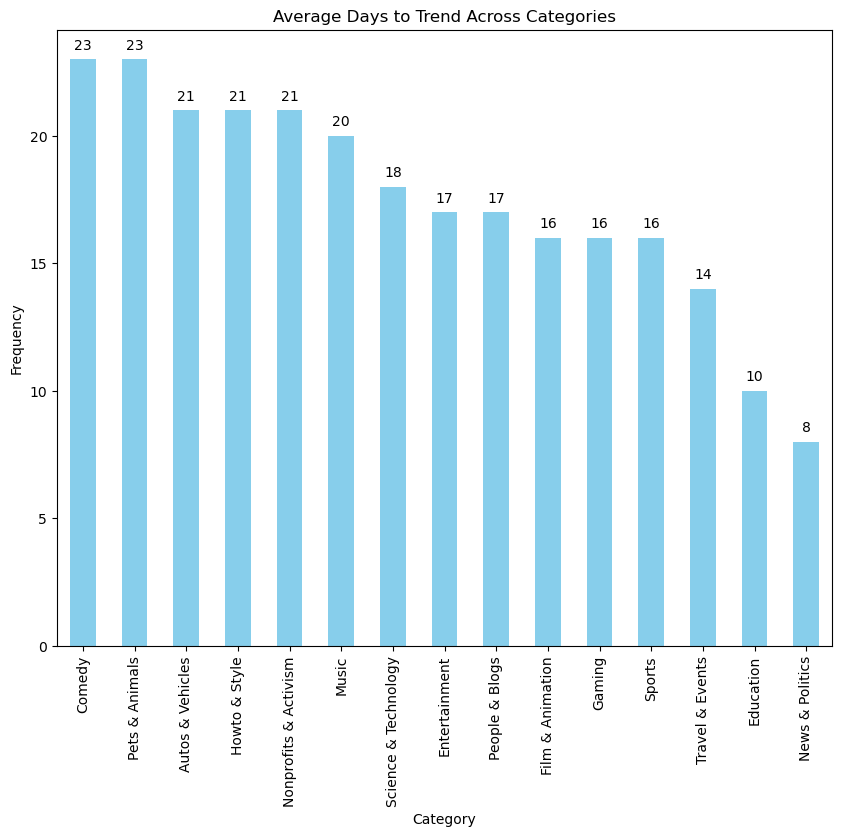

In [5]:
# simple_df.groupby('Category_Name')['Date_Diff'].mean().plot.bar()

count = round(simple_df.groupby('Category_Name')['Date_Diff'].mean(), 0).sort_values(ascending = False)

plt.figure(figsize=(10, 8))
annotation = count.plot(kind='bar', color='skyblue')

for p in annotation.patches:
    annotation.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Average Days to Trend Across Categories')
plt.show()

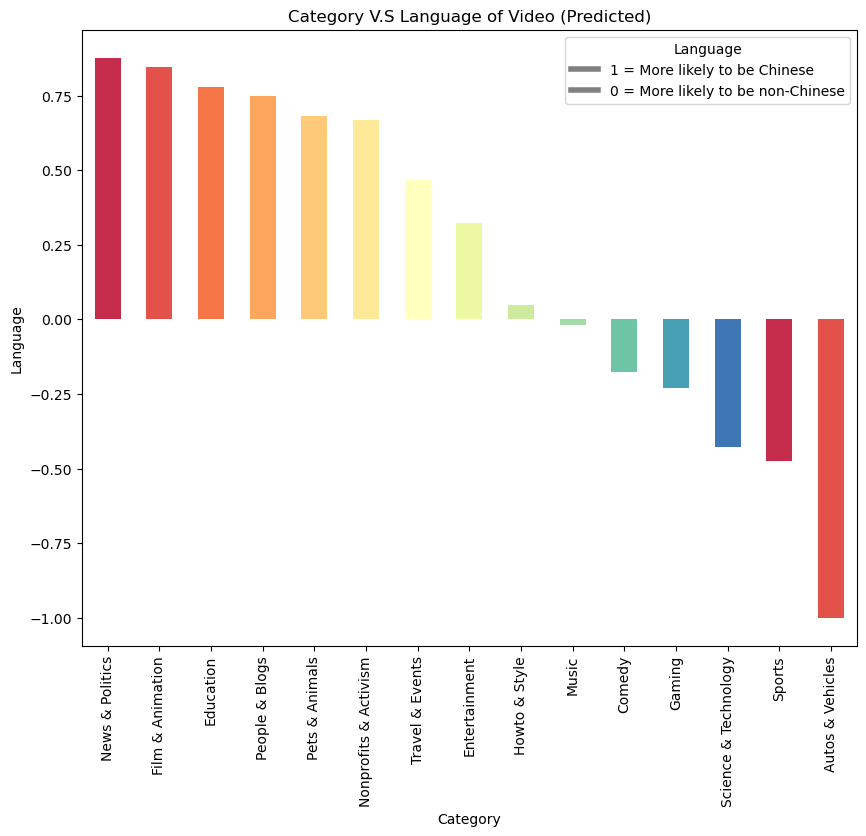

In [6]:
import numpy as np
simple_df['Language'] = np.where(simple_df['ChineseInTitle'] == 1, 1, -1) #1: Chinese, -1: Non-Chinese

count = round(simple_df.groupby('Category_Name')['Language'].mean(), 3).sort_values(ascending = False)

palette = sns.color_palette("Spectral", len('Category_Name'))

plt.figure(figsize=(10, 8))
annotation = count.plot(kind='bar', color=palette)

# for p in annotation.patches:
#     annotation.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
#                 ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.xlabel('Category')
plt.ylabel('Language')
plt.title('Category V.S Language of Video (Predicted)')

from matplotlib.lines import Line2D

handles = [Line2D([0], [0], color = 'grey', lw = 4, label = '1 = More likely to be Chinese'),
           Line2D([0], [0], color = 'grey', lw = 4, label = '0 = More likely to be non-Chinese')]

plt.legend(handles=handles, title='Language')

plt.show()

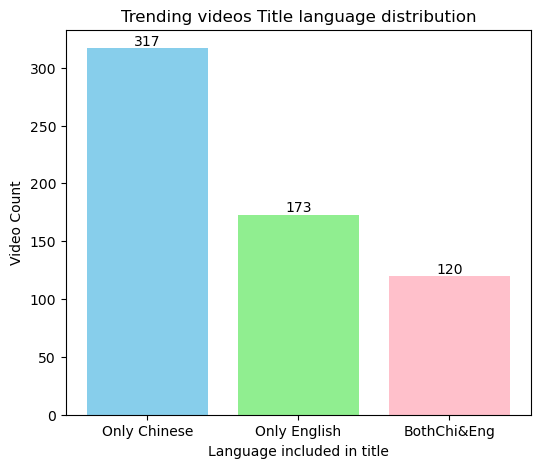

In [7]:
value_count = (simple_df['ChineseInTitle'].sum() - simple_df['Eng&ChiInTitle'].sum(),
simple_df['EnglishInTitle'].sum() - simple_df['Eng&ChiInTitle'].sum(),
simple_df['Eng&ChiInTitle'].sum())
data = {
    'Language' : ['Only Chinese', 'Only English', 'BothChi&Eng'],
    'Counts': value_count
}

data_count = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(6, 5))

bars = plt.bar(
    data_count['Language'],
    data['Counts'],
    color = ['skyblue', 'lightgreen', 'pink'],
    label=['Only Chinese', 'Only English', 'Chi&Eng']
)
plt.xlabel('Language included in title')
plt.ylabel('Video Count')
plt.title('Trending videos Title language distribution')

for bar in bars: # Show marks of each bar
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, '%d' % int(height), ha='center', va='bottom')
# plt.legend()
plt.show()

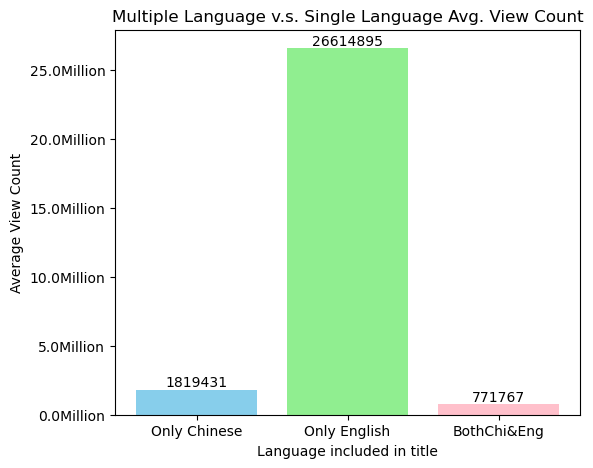

In [8]:
value_mean = (simple_df[simple_df['ChineseInTitle'] == 1]['View_Number'].mean(),
              simple_df[simple_df['EnglishInTitle'] == 1]['View_Number'].mean(),
              simple_df[(simple_df['EnglishInTitle'] == 1) & (simple_df['ChineseInTitle'] == 1)]['View_Number'].mean())

data = {
    'Language' : ['Only Chinese', 'Only English', 'BothChi&Eng'],
    'Counts': value_mean
}

data_mean = pd.DataFrame(data)

from matplotlib.ticker import FuncFormatter

# Plotting
plt.figure(figsize=(6, 5))

bars = plt.bar(
    data_mean['Language'],
    data_mean['Counts'],
    color = ['skyblue', 'lightgreen', 'pink'],
    label=['Only Chinese', 'Only English', 'Chi&Eng']
)
plt.xlabel('Language included in title')
plt.ylabel('Average View Count')
plt.title('Multiple Language v.s. Single Language Avg. View Count')

for bar in bars: # Show marks of each bar
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, '%d' % int(height), ha='center', va='bottom')

# Formatter function to convert y-axis values to millions
def millions(x, pos):
    return '%1.1fMillion' % (x * 1e-6)

# Apply the formatter to the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions))

# plt.legend()
plt.show()

In [9]:
simple_df.columns

Index(['Trending_Date', 'Channel_Name', 'Publish Date', 'Video_Name',
       'Category_ID', 'Category_Name', 'View_Number', 'Like_Number',
       'Comment_Number', 'Duration', 'Thumbnail_Link', 'Tags', 'Date',
       'Trending Number', 'DurationinSec', 'Shorts', 'TagsInTitle',
       'NumInTitle', 'EmojiInTitle', 'ChineseInTitle', 'EnglishInTitle',
       'Eng&ChiInTitle', 'OtherLanguageInTitle', 'ChineseInTags',
       'EnglishInTags', 'Eng&ChiInTags', 'Publish_Date', 'Date_Diff',
       'Language'],
      dtype='object')

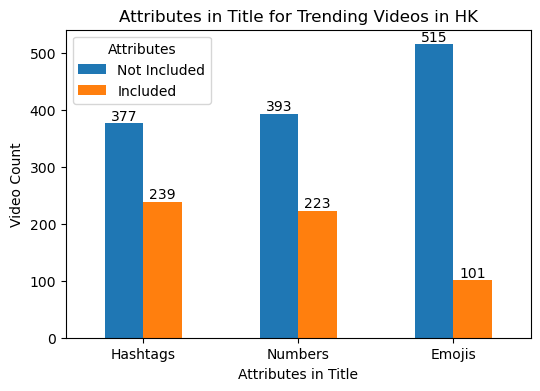

In [10]:
attributes_count = ({'Hashtags' : simple_df['TagsInTitle'].value_counts(),
                    'Numbers' : simple_df['NumInTitle'].value_counts(),
                    'Emojis' : simple_df['EmojiInTitle'].value_counts()})

data_count = pd.DataFrame(attributes_count)

data_count = data_count.transpose()
data_count.columns = ['Not Included', 'Included']

bar = data_count.plot(kind = 'bar', figsize=(6, 4))

plt.xlabel('Attributes in Title')
plt.ylabel('Video Count')
plt.title('Attributes in Title for Trending Videos in HK')

# Add data labels on top of each bar
for container in bar.containers:
    bar.bar_label(container, label_type='edge')

plt.legend(title='Attributes')
plt.xticks(rotation = 0)

plt.show()

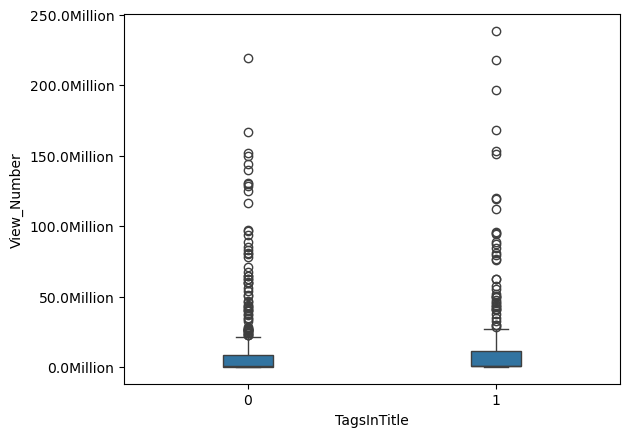

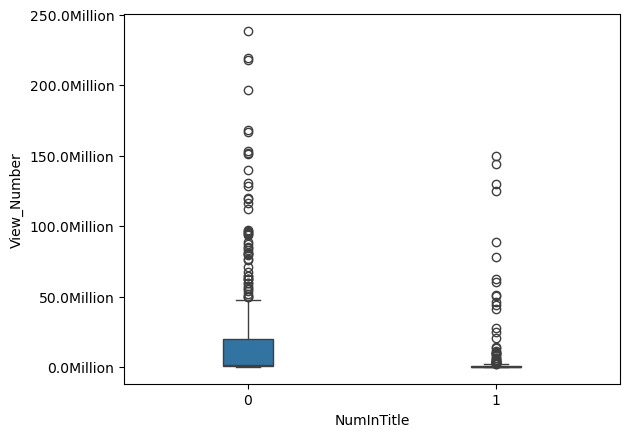

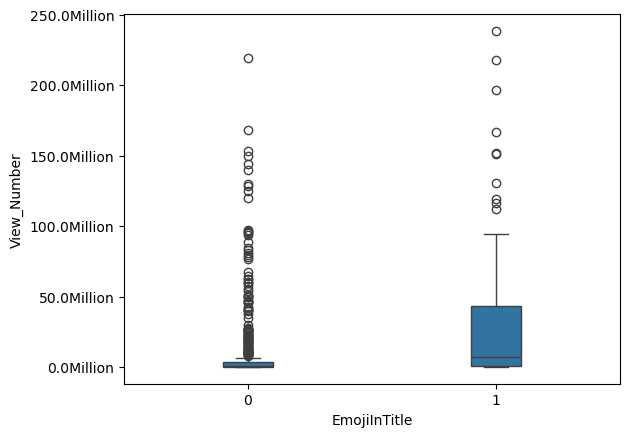

In [11]:
count = simple_df[['TagsInTitle', 'NumInTitle', 'EmojiInTitle']]

def box_plotter(data):
    for col in data:
        sns.boxplot(data = data, x = col, y = simple_df['View_Number'], width = 0.2)
        
        def millions(x, pos):
            return '%1.1fMillion' % (x * 1e-6)
        plt.gca().yaxis.set_major_formatter(FuncFormatter(millions))
        
        plt.show()

box_plotter(count)

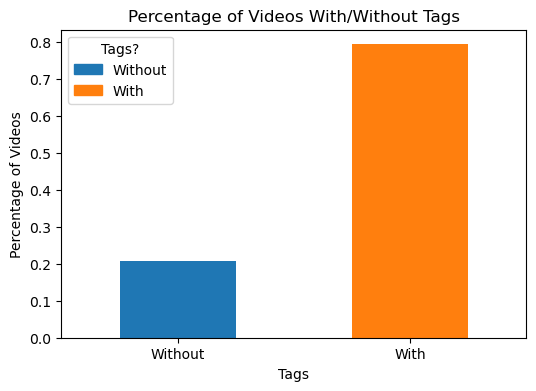

In [12]:
import matplotlib.patches as mpatches

tagsct = np.where(simple_df['Tags'].isna(), 'Without', 'With')
tagsct = pd.Series(tagsct, name='Tags')
bar = tagsct.value_counts(normalize = True).sort_values(ascending = True).plot.bar(figsize=(6, 4), color=['#1f77b4', '#ff7f0e'])
plt.xticks(rotation = 0)
plt.ylabel('Percentage of Videos')
plt.title('Percentage of Videos With/Without Tags')

# Manually create the legend
without_patch = mpatches.Patch(color='#1f77b4', label='Without')
with_patch = mpatches.Patch(color='#ff7f0e', label='With')
plt.legend(handles=[without_patch, with_patch], title='Tags?')

plt.show()

In [13]:
simple_df['Tagsct'] = simple_df['Tags'].str.split(',').fillna('')

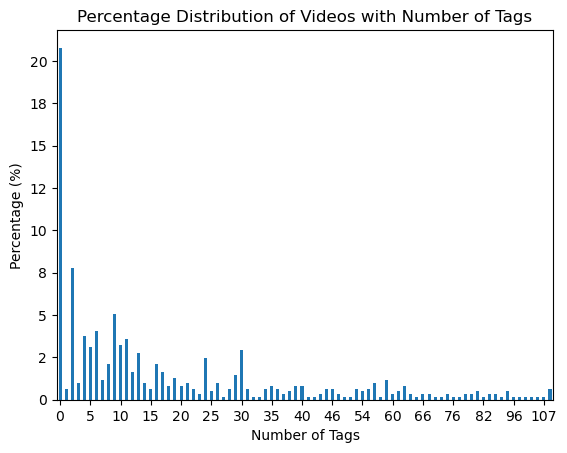

In [14]:
def perct(x, pos):
    return '%1.f' % (x * 100)
plt.gca().yaxis.set_major_formatter(FuncFormatter(perct))

ax = simple_df['Tagsct'].apply(len).value_counts(normalize = True).sort_index().plot.bar()

from matplotlib.ticker import AutoLocator, MultipleLocator

ax.xaxis.set_major_locator(MultipleLocator(5))

plt.xticks(rotation = 0)
plt.ylabel('Percentage (%)')
plt.xlabel('Number of Tags')
plt.title('Percentage Distribution of Videos with Number of Tags')
plt.show()

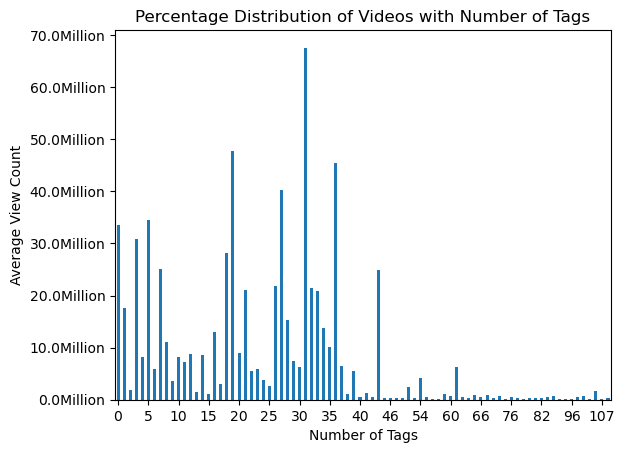

In [15]:
simple_df['Tagsct'] = simple_df['Tagsct'].apply(len)

def millions(x, pos):
    return '%1.1fMillion' % (x * 1e-6)
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions))

ax = simple_df.groupby('Tagsct')['View_Number'].mean().plot.bar()
ax.xaxis.set_major_locator(MultipleLocator(5))

plt.xticks(rotation = 0)
plt.ylabel('Average View Count')
plt.xlabel('Number of Tags')
plt.title('Percentage Distribution of Videos with Number of Tags')
plt.show()

In [16]:
dfc = df.dropna(subset=['Tags'])
top_tags = dfc['Tags'].str.split(',').explode().value_counts().head(5)
top_tags

Tags
搞笑        632
shorts    487
funny     419
日常        299
娛樂        285
Name: count, dtype: int64

In [17]:
top_tags_categories = dfc[dfc['Tags'].apply(lambda x: any(tag in x.split(',') for tag in top_tags.index))]
top_tags_categories = top_tags_categories[['Tags', 'Category_Name']]
top_tags_categories

,Tags,Category_Name
19,"生活,短剧,情感,恋爱,搞笑,甜蜜,抖音短剧,做我的猫,爱情,vlog,日常,抖音吴予,抖音...",People & Blogs
21,"豚鼠,法語,搞笑,vlog,日常,段子,巴黎,家人,故事,人物博客,Thurman貓一杯",People & Blogs
25,"ETtoday,即新聞,好笑影片,搞笑影片,好笑,搞笑,迷因,梗圖,meme,memes,新...",People & Blogs
27,"这不科学啊,科学实验,手工,阿基米吴,科学玩乐基地,科学,Science,science e...",People & Blogs
28,"TVB,翡翠台,無綫電視,TVB official,無線電視,電視節目,娛樂,流行都市,蘇民...",Entertainment
...,...,...
6666,"这不科学啊,科学实验,手工,阿基米吴,科学玩乐基地,科学,Science,science e...",People & Blogs
6667,"陳友,鍾鎮濤,溫拿,表錯七日情,張曼玉,影后,不脫襪的人,梅艷芳,兩妻,一屋兩妻,一妻兩夫,...",Entertainment
6671,"解说,中文,趣味,搞笑,睡鼠,萌宠,日常,动物,萌寵,動物,游戏,玩耍,dormouse,M...",People & Blogs
6672,"短視頻,愛情,現代,古代,戲劇,短劇,複仇,婚姻,搞笑,有趣,幽默,萌娃,short vid...",Film & Animation


In [18]:
exploded_tags = top_tags_categories.assign(Tags = top_tags_categories['Tags'].str.split(',')).explode('Tags')
exploded_tags = exploded_tags[exploded_tags['Tags'].isin(top_tags.index)]
exploded_tags = pd.DataFrame(exploded_tags)
exploded_tags

,Tags,Category_Name
19,搞笑,People & Blogs
19,日常,People & Blogs
21,搞笑,People & Blogs
21,日常,People & Blogs
25,搞笑,People & Blogs
...,...,...
6671,搞笑,People & Blogs
6671,日常,People & Blogs
6672,搞笑,Film & Animation
6672,funny,Film & Animation


In [19]:
map ={'搞笑' : 'Hilarious',
     'shorts' : 'Shorts',
     'funny' : 'Funny',
     '日常' : 'Daily',
     '娛樂' : 'Amusement'
    }

exploded_tags = exploded_tags.assign(Tags = exploded_tags['Tags'].map(map))
exploded_tags

,Tags,Category_Name
19,Hilarious,People & Blogs
19,Daily,People & Blogs
21,Hilarious,People & Blogs
21,Daily,People & Blogs
25,Hilarious,People & Blogs
...,...,...
6671,Hilarious,People & Blogs
6671,Daily,People & Blogs
6672,Hilarious,Film & Animation
6672,Funny,Film & Animation


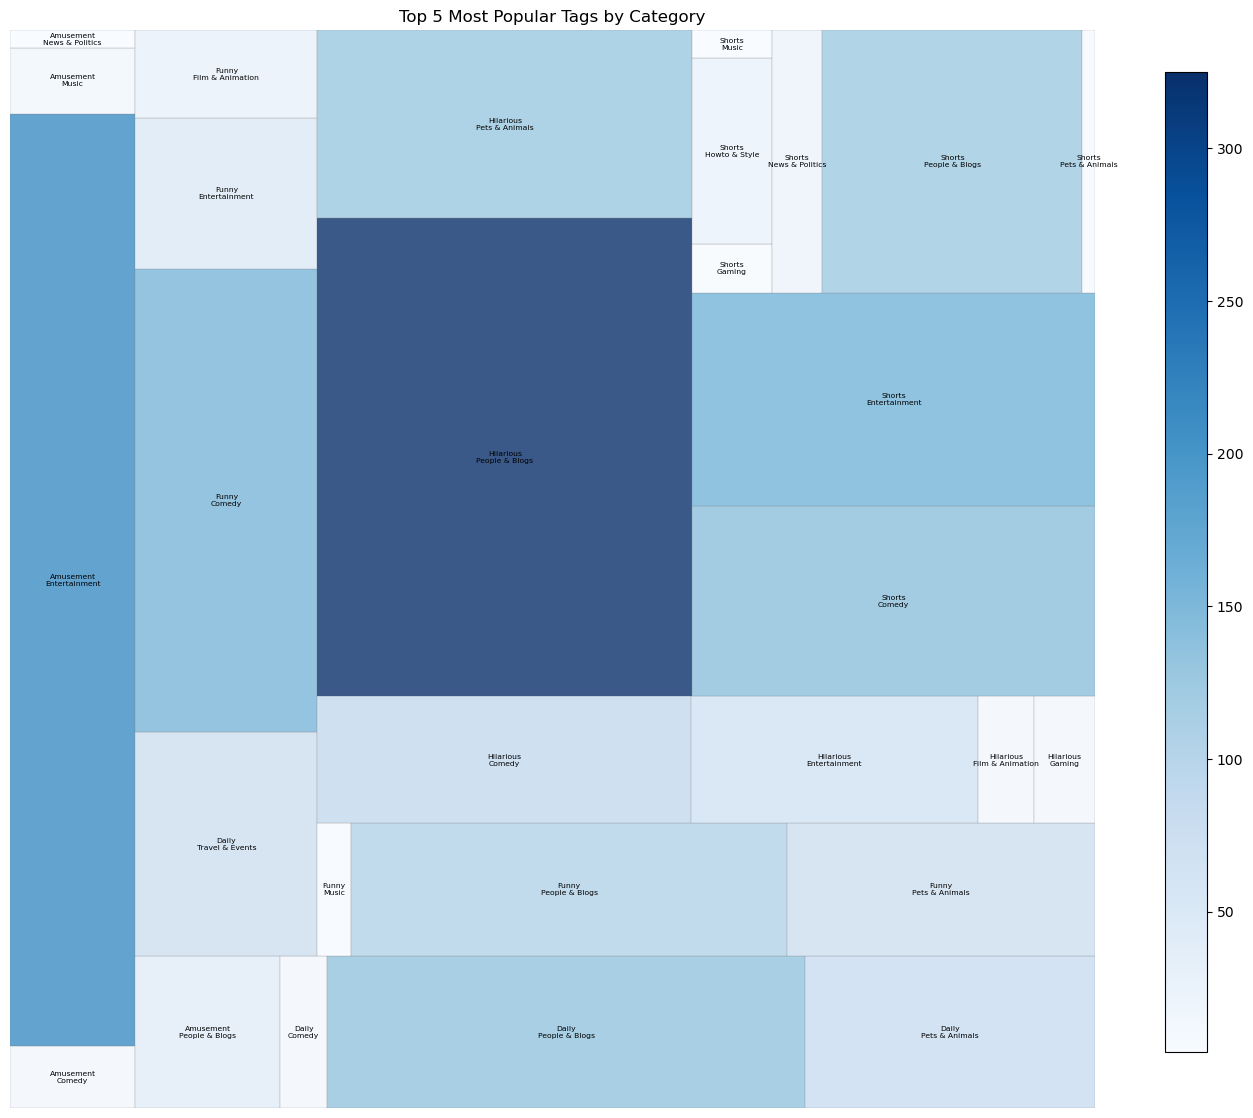

In [20]:
import squarify
import matplotlib.colors as mcolors

# Summarize the data to get the count of each tag within categories
tag_counts = exploded_tags.groupby(['Tags', 'Category_Name']).size().reset_index(name='Count')

# Create a list of sizes for the treemap
sizes = tag_counts['Count']
labels = [f"{row['Tags']}\n{row['Category_Name']}" for _, row in tag_counts.iterrows()]

# Use a continuous color palette
cmap = plt.get_cmap('Blues')  # You can choose any colormap you like
norm = mcolors.Normalize(vmin=min(sizes), vmax=max(sizes))
colors = [cmap(norm(value)) for value in sizes]

# Plot the treemap
fig, ax = plt.subplots(figsize = (14, 14))
squarify.plot(sizes = sizes, label = labels, alpha = 0.8, 
              color = colors, 
              text_kwargs = {'fontsize': 5.5},
              edgecolor = 'grey', linewidth=0.2)

# Define a new Axes for the colorbar, position it next to the treemap
cbar_ax = fig.add_axes([0.95, 0.15, 0.03, 0.7])  # [left, bottom, width, height]
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, cax=cbar_ax)
# cbar.set_label('Count')

# Customize the plot
ax.axis('off')
ax.set_title('Top 5 Most Popular Tags by Category')

# Display the plot
plt.show()

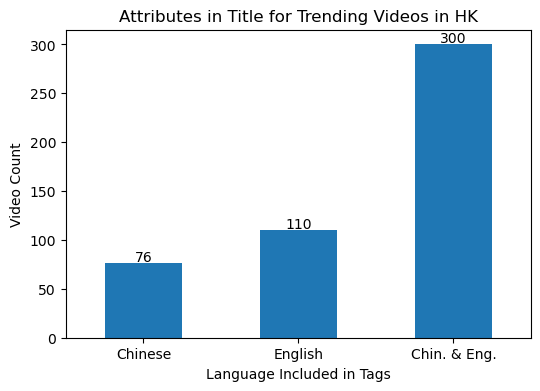

In [21]:
lang_count = ({'Only Chinese' : simple_df['ChineseInTags'].sum() - simple_df['Eng&ChiInTags'].sum(),
                    'Only English' : simple_df['EnglishInTags'].sum() - simple_df['Eng&ChiInTags'].sum(),
                    'Chin. & Eng.' : simple_df['Eng&ChiInTags'].sum()})

lang_count = pd.DataFrame(lang_count, index = [0])
lang_count.columns = ['Chinese', 'English', 'Chin. & Eng.']

lang_count = lang_count.transpose()

bar = lang_count.plot(kind = 'bar', figsize=(6, 4))

for p in bar.patches:
    bar.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 4.5), textcoords='offset points')

plt.xlabel('Language Included in Tags')
plt.ylabel('Video Count')
plt.title('Attributes in Title for Trending Videos in HK')

plt.legend().remove()
plt.xticks(rotation = 0)

plt.show()

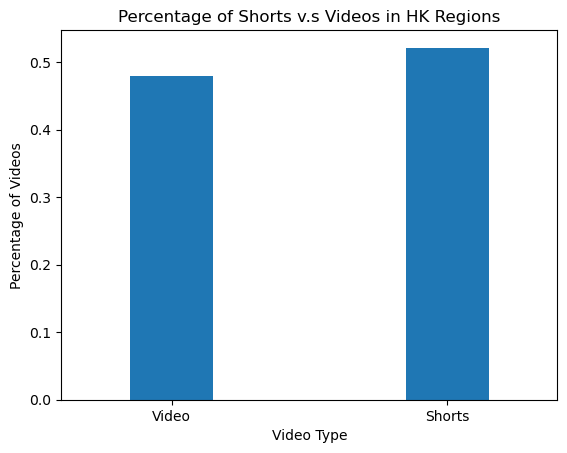

In [22]:
map ={
     0 : 'Video',
     1 : 'Shorts'
    }
simple_df = simple_df.assign(Shorts = simple_df['Shorts'].map(map))
bar = simple_df['Shorts'].value_counts(normalize = True).sort_values(ascending = True).plot.bar(width = .3)

# Add data labels on top of each bar
# for container in bar.containers:
#     bar.bar_label(container, fmt='%.2f')

plt.xticks(rotation = 0)
plt.ylabel('Percentage of Videos')
plt.xlabel('Video Type')
plt.title('Percentage of Shorts v.s Videos in HK Regions')
plt.show()

Text(0.5, 1.0, 'Percentage Distribution of Shorts Length in HK Region')

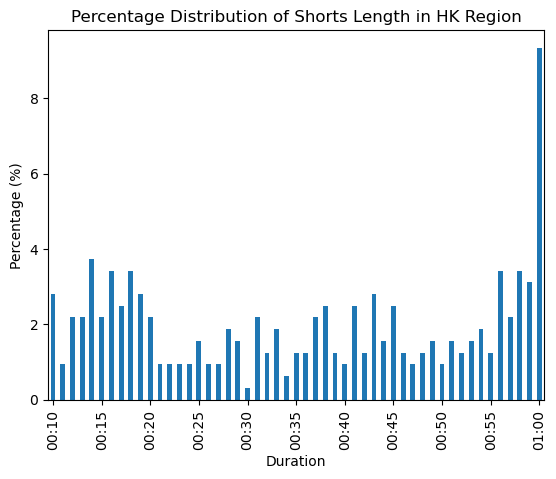

In [23]:
simple_dfs = simple_df[simple_df['Shorts'] == 'Shorts']

def perct(x, pos):
    return '%1.f' % (x * 100)
plt.gca().yaxis.set_major_formatter(FuncFormatter(perct))

ax = simple_dfs['Duration'].value_counts(normalize = True).sort_index().plot.bar()

ax.xaxis.set_major_locator(MultipleLocator(5))

plt.xlabel('Duration')
plt.ylabel('Percentage (%)')
plt.title('Percentage Distribution of Shorts Length in HK Region')

In [24]:
simple_dfv = simple_df[simple_df['Shorts'] == 'Video']

# Function to bin the times
def bin_time(time_str):
    parts = time_str.split(':')
    if len(parts) == 2:  # Format is MM:SS
        hours = 0
        minutes = int(parts[0])
    elif len(parts) == 3:  # Format is HH:MM:SS
        hours = int(parts[0])
        minutes = int(parts[1])
    
    binned_time = f"{hours:02}:{minutes:02}:00" if hours > 0 else f"00:{minutes:02}:00"
    return binned_time

# Apply the function to the 'Duration' column
simple_dfv['BinnedDuration'] = simple_dfv['Duration'].apply(bin_time)

# Display the DataFrame with the new truncated duration
simple_dfv.head()

C:\Users\sa654\AppData\Local\Temp\ipykernel_10768\2471204896.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  simple_dfv['BinnedDuration'] = simple_dfv['Duration'].apply(bin_time)


,Trending_Date,Channel_Name,Publish Date,Video_Name,Category_ID,Category_Name,View_Number,Like_Number,Comment_Number,Duration,...,Eng&ChiInTitle,OtherLanguageInTitle,ChineseInTags,EnglishInTags,Eng&ChiInTags,Publish_Date,Date_Diff,Language,Tagsct,BinnedDuration
1,2024-02-26,Red Bull Bike,2024-01-25T11:10:44Z,Back Where He‘s Most Alive 😍🔥 #mtb,17,Sports,43114435,1664315,7901,01:01,...,0,0,0,0,0,2024-01-25 11:10:44,31,-1,0,00:01:00
2,2024-02-26,城寨 Singjai,2024-02-22T15:48:32Z,三不館： 共黨管治本質的變與不變 西方三次誤判 政治掛帥政權至上從未改變 四個堅持才是硬核 ...,25,News & Politics,117718,9114,308,1:40:59,...,0,0,1,1,1,2024-02-22 15:48:32,3,1,2,01:40:00
6,2024-02-26,城寨 Singjai,2024-02-23T15:28:05Z,城寨新聞 23 Feb 2024 台灣漢服統戰工作 曹縣漢服十億產業是壽衣棺材生產基地 外商...,25,News & Politics,102501,8157,162,1:22:19,...,1,0,1,1,1,2024-02-23 15:28:05,2,1,2,01:22:00
7,2024-02-26,NFL,2024-02-12T04:46:24Z,San Francisco 49ers vs. Kansas City Chiefs | S...,17,Sports,10102599,109911,15323,21:02,...,0,0,0,0,0,2024-02-12 04:46:24,13,-1,0,00:21:00
11,2024-02-26,全球大視野,2024-02-25T15:05:01Z,美制裁俄牽連中企 G7也扯中國! A股迎牛市 房地產谷底翻身! 輝達:華為是最大競爭對手【國...,25,News & Politics,248523,17557,268,2:00:51,...,0,0,1,1,1,2024-02-25 15:05:01,0,1,24,02:00:00


Text(0.5, 1.0, 'Percentage Distribution of Video with Different Length in HK Region')

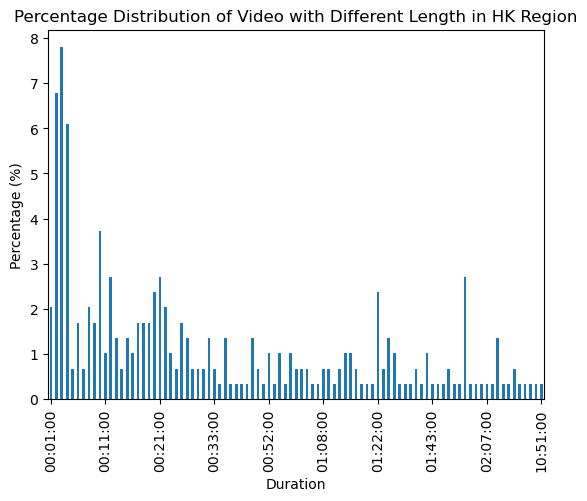

In [25]:
def perct(x, pos):
    return '%1.f' % (x * 100)
plt.gca().yaxis.set_major_formatter(FuncFormatter(perct))

ax = simple_dfv['BinnedDuration'].value_counts(normalize = True).sort_index().plot.bar()

ax.xaxis.set_major_locator(MultipleLocator(10))

plt.xlabel('Duration')
plt.ylabel('Percentage (%)')
plt.title('Percentage Distribution of Video with Different Length in HK Region')

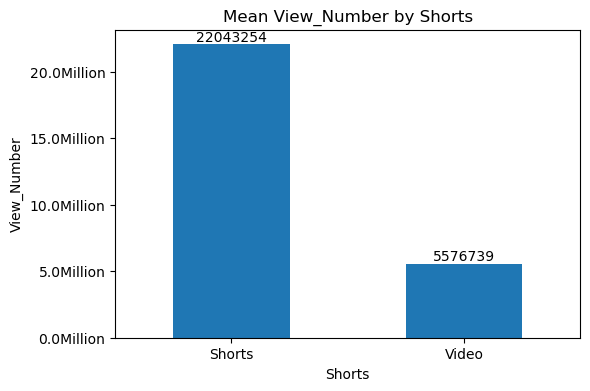

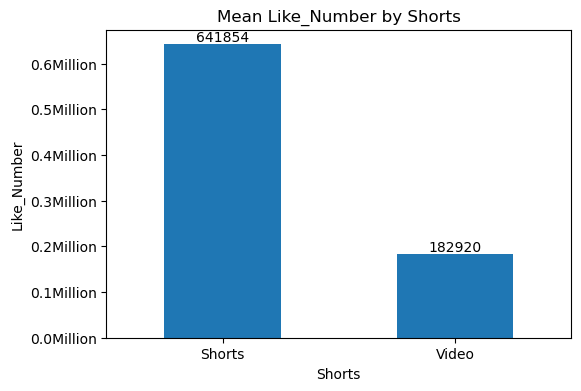

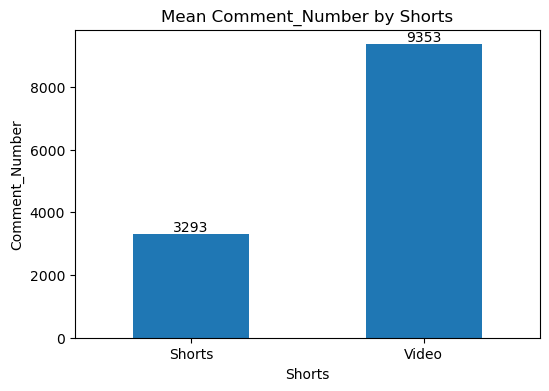

In [26]:
attributes = ['View_Number', 'Like_Number', 'Comment_Number']

# Group by 'Shorts' and calculate the mean
grouped_df = simple_df.groupby('Shorts')[attributes].mean()

# Define the function to format y-axis
def millions(y, pos):
    return '%1.1fMillion' % (y * 1e-6)

# Plot each attribute
for col in attributes:
    bar = grouped_df[col].plot(kind='bar', figsize=(6, 4))
    plt.title(f'Mean {col} by Shorts')
    plt.xlabel('Shorts')
    plt.ylabel(col)
    for container in bar.containers:
            bar.bar_label(container, fmt = '%1.0f')
    if col in ['View_Number', 'Like_Number']:
        plt.gca().yaxis.set_major_formatter(FuncFormatter(millions))
    plt.xticks(rotation = 0)
    plt.show()
